# Twitter Influencer Analysis*

### *work in progress

By Shahab Sheikh-Bahaei

Contents
- [Get 1 month of home tweets](#Q:-get-1-month-of-home-tweets)
- [Who has the most number of tweets?](#Q:-Who-has-the-most-number-of-tweets?)
- [Histogram of number of tweets per user](#Q:--Histograms-of-number-of-tweets-per-user)
- [Top most liked tweets](#Top-most-liked-tweets)
- [tbd](#asd)
- [tbd](#asd)
- [tbd](#asd)


#### Install necessary python libraries

In [1]:
# !pip install tweepy
# !pip install visJS2jupyter
# !pip install py2cytoscape
# !pip install networkx

In [84]:
from matplotlib import pyplot as plt
import networkx as nx
from visJS2jupyter import visJS_module
import pandas as pd
import numpy as np
from collections import Counter
import tweepy

In [77]:
import keys

In [5]:
%matplotlib notebook

In [12]:
consumer_key = keys.consumer_key
consumer_secret = keys.consumer_secret
access_token = keys.access_token
access_token_secret = keys.access_token_secret

In [13]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

### Q: get 1 month of home tweets

In [176]:
# start_date = "2017-08-01"
ht=api.home_timeline(count=200)
last_id = ht[-1].id
while True:
    t=api.home_timeline(count=200, max_id=last_id-1)
    if not t:
        break
    last_id = t[-1].id
    ht.extend(t)
    print len(ht)

399
599
799
811


In [177]:
len(ht)

811

In [178]:
latest = ht[0]

In [179]:
latest.created_at

datetime.datetime(2017, 9, 8, 23, 47, 8)

In [180]:
oldest = ht[-1]

In [181]:
oldest.created_at

datetime.datetime(2017, 8, 5, 19, 15, 22)

### Q: Who has the most number of tweets?

In [182]:
a=Counter([t.author.screen_name for t in ht])

a.most_common()

[(u'realDonaldTrump', 278),
 (u'SenSanders', 95),
 (u'SenWarren', 88),
 (u'fashionistatalk', 86),
 (u'HenryJEvans', 86),
 (u'kellymcevers', 79),
 (u'StephenAtHome', 29),
 (u'HillaryClinton', 20),
 (u'elizabethforma', 19),
 (u'astorino_steven', 10),
 (u'BarackObama', 8),
 (u'ShahriarSh', 7),
 (u'JZarif', 6)]

### Q:  Histograms of number of tweets per user

In [183]:
d=pd.DataFrame(a.items(), columns=["screen_name","tweet_count"])

In [184]:
d.set_index("screen_name", inplace=True)

In [185]:
d.sort_values(by="tweet_count", inplace=True)

<IPython.core.display.Javascript object>


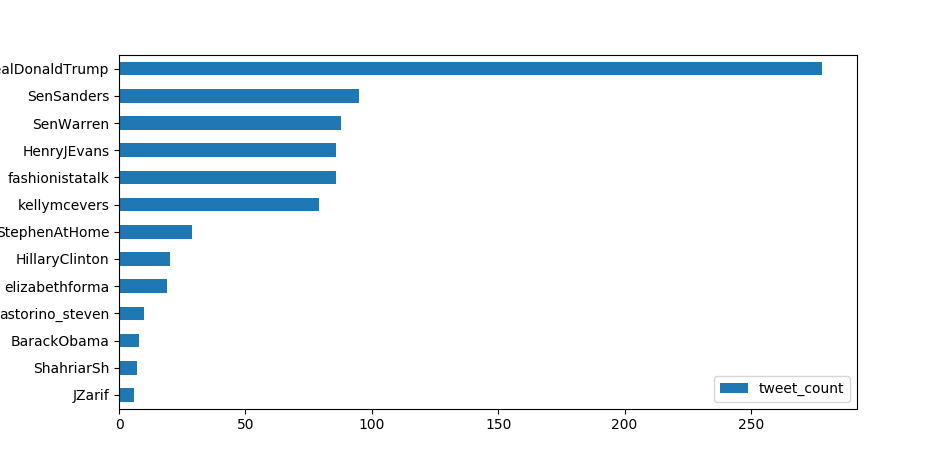

In [186]:
d.plot.barh(y="tweet_count");

### Q: transform the tweeter data format to DataFrame for easier analysis

In [452]:
# latest.__dict__

In [144]:
use_fields = ["id","created_at", "favorite_count","retweet_count","retweeted","user.screen_name","user.followers_count",
              "text"]

In [187]:
df=pd.DataFrame([[eval("t."+c) for c in use_fields] for t in ht], columns=use_fields).set_index("id")

### Top most liked tweets

In [451]:
df.sort_values(by="favorite_count", ascending=False).head(5)

,created_at,favorite_count,retweet_count,retweeted,user.screen_name,user.followers_count,text
id,,,,,,,
896523232098078720,2017-08-13 00:06:09,4590167,1707297,False,BarackObama,94589040,"""No one is born hating another person because ..."
898261944095789056,2017-08-17 19:15:11,1631429,324677,False,BarackObama,94589040,Michelle and I are thinking of the victims and...
896523304873238528,2017-08-13 00:06:27,1587579,502624,False,BarackObama,94589040,"""People must learn to hate, and if they can le..."
896523357272911872,2017-08-13 00:06:39,1417239,415697,False,BarackObama,94589040,"""...For love comes more naturally to the human..."
905141484386750469,2017-09-05 18:52:01,910297,387807,False,BarackObama,94589039,To target hopeful young strivers who grew up h...


### Q: plot favorite_count as a time series for specific users

<IPython.core.display.Javascript object>


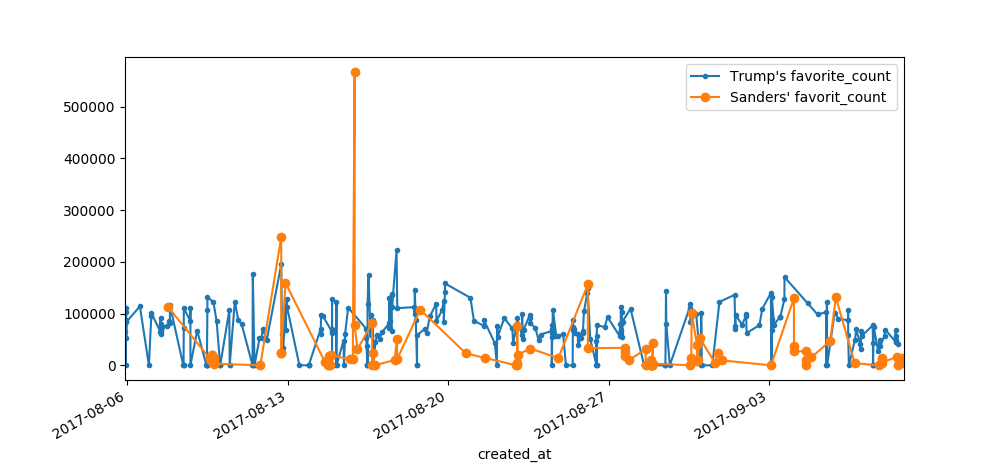

In [190]:
ax=df.loc[df["user.screen_name"]=="realDonaldTrump"].set_index("created_at").plot(y="favorite_count",marker='.')
df.loc[df["user.screen_name"]=="SenSanders"].set_index("created_at").plot(y="favorite_count", marker='o',ax=ax)
ax.legend(["Trump's favorite_count","Sanders' favorit_count"])

### Q: Who has the most number of followers?

In [191]:
gfl=df[["user.screen_name","user.followers_count"]].groupby("user.screen_name").max().sort_values("user.followers_count")

<IPython.core.display.Javascript object>


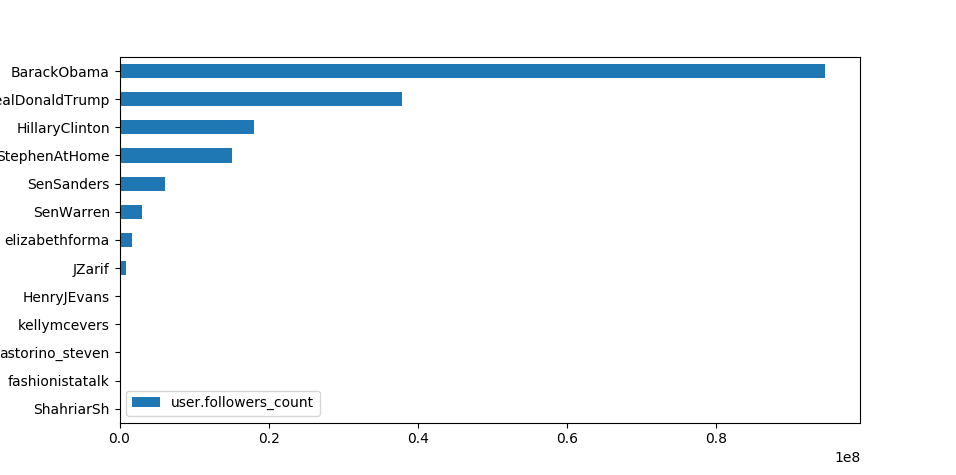

In [192]:
gfl.plot.barh()

#### Log Scale

<IPython.core.display.Javascript object>


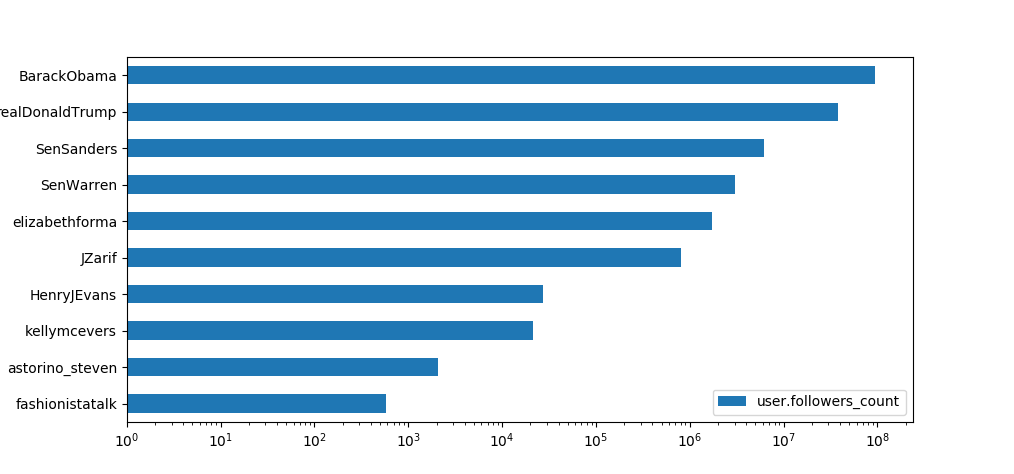

In [162]:
gfl.plot.barh(log=True)

### Q: create a directed graph of users (nodes: authors, edges: following)

In [15]:
import matplotlib as mpl
import networkx as nx
import visJS2jupyter.visJS_module

In [21]:
import cPickle as pickle

In [16]:
users={i.id:i for i in api.friends()}

In [17]:
g=nx.DiGraph()

In [18]:
g.add_nodes_from(users)

In [19]:
g.nodes()

[1916120257,
 16303106,
 970207298,
 813286,
 87823144,
 29442313,
 46541122,
 2238324110,
 40815629,
 47813521,
 1339835893,
 357606935,
 1926683448,
 104673756,
 2176745083,
 197574940,
 25073877]

In [56]:
user_list=g.nodes()
for n in np.random.permutation(user_list):
    if g.edges(n):
        continue
    fl=users[n].followers()
    fr=users[n].friends()
    new_users={i.id:i for i in fl+fr}
    users.update(new_users)
    g.add_nodes_from(new_users)
    print "Num. users:", len(g.nodes())
    g.add_edges_from([(n,i.id) for i in fl])
    g.add_edges_from([(i.id,n) for i in fr])

Num. users: 463
Num. users: 482
Num. users: 517
Num. users: 556
Num. users: 569
Num. users: 608
Num. users: 645
Num. users: 665
Num. users: 667
Num. users: 706
Num. users: 742
Num. users: 781
Num. users: 783
Num. users: 823
Num. users: 861


RateLimitError: [{u'message': u'Rate limit exceeded', u'code': 88}]

##### Sanity Check

In [58]:
user_list=users#g.nodes()
i=0
j=0
for n in user_list:
    #print n,
    if g.edges(n):
        #print "yes"
        i+=1
    else:
        #print "no"
        j+=1

print "nodes with edge:",i
print "nodes without edge:",j


nodes with edge: 495
nodes without edge: 366


In [59]:
len(g.edges())

901

In [60]:
len(g.nodes())

861

In [61]:
with open("my_twitter_network.pkl","w") as f:
    pickle.dump(g, f)

### Q: Analyse Centrality (as a potential measure of influence)

In [62]:
G1 = g 
nodes1 = G1.nodes()
edges1 = G1.edges()

#### betweenness_centrality
Compute the shortest-path betweenness centrality for nodes.

Betweenness centrality of a node `v` is the sum of the
fraction of all-pairs shortest paths that pass through `v`

math:

   $$c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$$

where $V$ is the set of nodes, $\sigma(s, t)$ is the number of
shortest $(s, t)$-paths,  and $\sigma(s, t|v)$ is the number of those
paths  passing through some  node `v` other than `s, t`.
If $s = t$, $\sigma(s, t) = 1$, and if $v \in {s, t}$,
$\sigma(s, t|v) = 0$.

In [64]:
bc = nx.betweenness_centrality(G1)

In [78]:
df_bc=pd.DataFrame(data=[(users[i].screen_name, b) for i,b in sorted(bc.items(),key=lambda x:x[1], reverse=True)],
                   columns = ["screen_name","betweenness_score"]).set_index("screen_name")
                   

### Q: Who has the highest betweenness score?

In [79]:
df_bc.head()

,betweenness_score
screen_name,
ShahriarSh,0.002864
kymihypek,0.002759
kellymcevers,0.002139
realMouseLight,0.002003
MansoorSB,0.001781


<IPython.core.display.Javascript object>


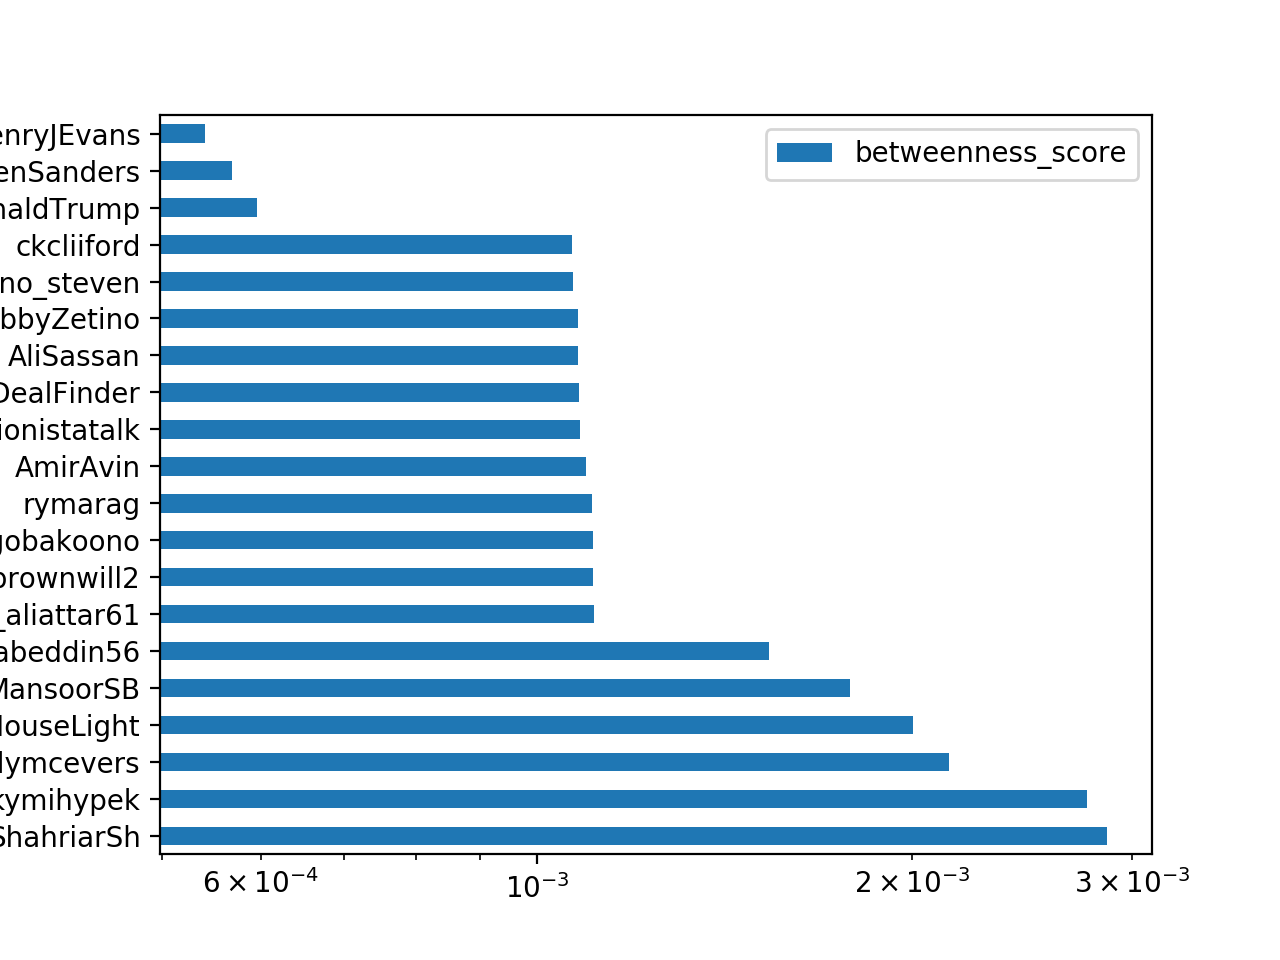

In [82]:
df_bc.head(20).plot.barh(y="betweenness_score", log=True)

#### load_centrality

In [68]:
lc=nx.load_centrality(g)

In [69]:
df_lc=pd.DataFrame(data=[(users[i].screen_name, b) for i,b in sorted(lc.items(),key=lambda x:x[1], reverse=True)],
                   columns = ["screen_name","load_centrality"]).set_index("screen_name")

In [70]:
df_lc.head(10)

,load_centrality
screen_name,
ShahriarSh,0.002864
kymihypek,0.002759
kellymcevers,0.002139
realMouseLight,0.002003
MansoorSB,0.001781
shahabeddin56,0.001535
ali_aliattar61,0.001110
morisbrownwill2,0.001109
netsugobakoono,0.001109


### Q: Visualize the graph

In [71]:
degree = G1.degree()
p=nx.spring_layout(G1)

nx.set_node_attributes(G1,'degree',degree)

nx.set_node_attributes(G1,'betweenness_centrality',bc)

# map the betweenness centrality to the node color, using matplotlib spring_r colormap
node_to_color = visJS2jupyter.visJS_module.return_node_to_color(G1,field_to_map='betweenness_centrality',
                                                                cmap=mpl.cm.spring_r,alpha = 1,
                                                 color_max_frac = .9,color_min_frac = .1)

# set node initial positions using networkx's spring_layout function
pos = nx.spring_layout(G1)

nodes_dict1 = [{"id":users[n].screen_name,"color":node_to_color[n],
               "degree":np.log(users[n].followers_count), #nx.degree(G1,n),
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000
               } for n in nodes1
              ]
node_map1 = dict(zip(nodes1,range(len(nodes1))))  # map to indices for source/target in edges
edges_dict1 = [{"source":node_map1[edges1[i][0]], "target":node_map1[edges1[i][1]], 
              "color":"gray","title":'test'} for i in range(len(edges1))]

In [76]:
# set some network-wide styles
visJS2jupyter.visJS_module.visjs_network(nodes_dict1,edges_dict1,
                          node_size_multiplier=5,node_size_transform = '',
                          node_color_highlight_border='red',node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',node_color_hover_background='#8BADD3',
                          node_font_size=25,edge_arrow_to=True,physics_enabled=True,edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',edge_width=3,max_velocity=15,min_velocity=1)

### Q: Visualize influence using number of retweets and likes

- Which user has more influence on his/her followers? 
- Retweeting and liking may be indicatorts of influence.

### Q: Create a new graph based on retweets 
#### (nodes: users, edges: retweets, i.e. edge from A to B: B retweet A)

In [83]:
# coming soon